In [49]:
import pandas as pd
import cdsapi
import atlite
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [50]:
df = pd.read_excel('CDS_Data_Validation\\2019-2023 Solar Profile SPP rev.xlsx', sheet_name = '2019-2023_Central',skiprows=4)
df = df.merge(pd.read_excel('CDS_Data_Validation\\2019-2023 Solar Profile SPP rev.xlsx', sheet_name = '2019-2023_North',skiprows=4))
df['index_time'] = pd.to_datetime(df["REF"].dt.strftime('%Y-%m-%d-%H'))
df = df.drop(columns=['REF'])
df = df.groupby(by=["index_time"], dropna=False).mean()

print(df.columns)

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')


In [51]:
installed_capacity = [
    34.2,
    126.126,
    73,
    52,
    128.396,
    133.92
]

for i in range(len(df.columns)):
    df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
    df[df.columns[i]] = df[df.columns[i]]/installed_capacity[i]

data_actual = df.copy()
print(data_actual.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43825 entries, 2019-01-01 00:00:00 to 2024-01-01 00:00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BCPG-N[MCC_BCP-N(MW)]  43804 non-null  float64
 1   EAN-N[R4_EAN-N(MW)]    43797 non-null  float64
 2   NED-N[R1_NED-N(MW)]    43825 non-null  float64
 3   SSP-N[R1_SSP-N(MW)]    43813 non-null  float64
 4   EAL-N[R4_EAL-N(MW)]    43825 non-null  float64
 5   EAP-N[R4_EAP-N(MW)]    43825 non-null  float64
dtypes: float64(6)
memory usage: 2.3 MB
None


C:\Users\595078\AppData\Local\Temp\ipykernel_7636\2237089100.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
C:\Users\595078\AppData\Local\Temp\ipy

In [52]:
df = pd.DataFrame()
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2019_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2020_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2021_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2022_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2023_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = df.set_index('time_utcadj')

year = 2023
df = df.loc[df.index.year == year]
data_actual = data_actual.loc[data_actual.index.year == year]


In [53]:
name_list = data_actual.columns
name_list

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')

In [54]:
for i in name_list:
    print(str(year) + " " + i)
    print('Acutal PF = ',np.round(data_actual[i].sum() * 100 /len(data_actual),4))
    print('ERA5 PF = ',np.round(df[i].sum() * 100 /len(df),4))
    print('Diff from actual percen  = ', np.round((df[i].sum() - data_actual[i].sum())*100/data_actual[i].sum(),1))
    print('')

2023 BCPG-N[MCC_BCP-N(MW)]
Acutal PF =  11.9755
ERA5 PF =  16.9923
Diff from actual percen  =  41.9

2023 EAN-N[R4_EAN-N(MW)]
Acutal PF =  18.2777
ERA5 PF =  17.4067
Diff from actual percen  =  -4.8

2023 NED-N[R1_NED-N(MW)]
Acutal PF =  15.9577
ERA5 PF =  17.5039
Diff from actual percen  =  9.7

2023 SSP-N[R1_SSP-N(MW)]
Acutal PF =  18.1906
ERA5 PF =  17.5039
Diff from actual percen  =  -3.8

2023 EAL-N[R4_EAL-N(MW)]
Acutal PF =  19.8079
ERA5 PF =  17.033
Diff from actual percen  =  -14.0

2023 EAP-N[R4_EAP-N(MW)]
Acutal PF =  19.3367
ERA5 PF =  17.2417
Diff from actual percen  =  -10.8



In [55]:
plantfactor_actual_monthly = pd.DataFrame()
for i in name_list:
    pf_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()/len(data_actual.loc[data_actual.index.month == (j+1)])) for j in range(12)]
    
    plantfactor_actual_monthly[i] = pd.DataFrame(pf_month_list)

print(str(year) + " pf actual (%) = \n",np.round(plantfactor_actual_monthly*100,1))

2023 pf actual (%) = 
     BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    14.6                 19.5                 16.6   
1                    13.9                 18.5                 15.5   
2                     8.9                 19.9                 16.2   
3                    10.3                 19.8                 17.6   
4                    13.8                 19.5                 17.8   
5                    10.2                 18.0                 16.2   
6                    13.5                 17.3                 15.4   
7                    12.8                 17.2                 15.4   
8                     8.6                 16.9                 14.1   
9                    12.6                 15.5                 14.2   
10                   11.3                 18.4                 15.4   
11                   13.2                 18.8                 16.9   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R

In [56]:
plantfactor_era5_monthly = pd.DataFrame()
for i in name_list:
    pf_month_list = [(df[i].loc[df.index.month == (j+1)].sum()/len(df.loc[df.index.month == (j+1)])) for j in range(12)]
    
    plantfactor_era5_monthly[i] = pd.DataFrame(pf_month_list)

print(str(year) + " pf era5 (%) = \n",np.round(plantfactor_era5_monthly*100,1))

2023 pf era5 (%) = 
     BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    18.1                 18.7                 18.7   
1                    18.6                 18.7                 18.8   
2                    20.6                 21.0                 21.0   
3                    20.0                 20.5                 20.5   
4                    18.1                 18.6                 18.7   
5                    16.0                 15.9                 16.2   
6                    14.6                 15.4                 15.5   
7                    15.6                 16.0                 16.4   
8                    13.5                 13.5                 14.1   
9                    15.0                 15.3                 15.6   
10                   17.2                 17.7                 17.6   
11                   16.8                 17.6                 17.1   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_

In [57]:
plantfactor_difffromactual = pd.DataFrame()
for i in name_list:
    pf_actual_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()/len(data_actual.loc[data_actual.index.month == (j+1)])) for j in range(12)]
    pf_era5_month_list = [(df[i].loc[df.index.month == (j+1)].sum()/len(df.loc[df.index.month == (j+1)])) for j in range(12)]
    pf_difffromactual_list = [( pf_era5_month_list[j] - pf_actual_month_list[j] ) / pf_actual_month_list[j] for j in range(12)]
    plantfactor_difffromactual[i] = pd.DataFrame(pf_difffromactual_list)
print(str(year) + " pf era5 diff from actual (%) = \n",np.round(plantfactor_difffromactual*100,1))

2023 pf era5 diff from actual (%) = 
     BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    23.9                 -3.9                 12.6   
1                    33.9                  0.9                 21.1   
2                   131.3                  5.3                 29.8   
3                    94.3                  3.8                 16.6   
4                    31.5                 -4.5                  5.0   
5                    56.1                -11.8                 -0.3   
6                     7.8                -10.7                  0.4   
7                    22.0                 -7.3                  5.9   
8                    56.3                -20.0                  0.0   
9                    19.6                 -1.3                  9.8   
10                   52.5                 -3.7                 13.7   
11                   27.1                 -6.7                  1.4   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-

Measure, time series similarity

In [58]:
name_list = data_actual.columns
name_list

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')

EAN-N[R4_EAN-N(MW)]


<Axes: xlabel='time_utcadj'>

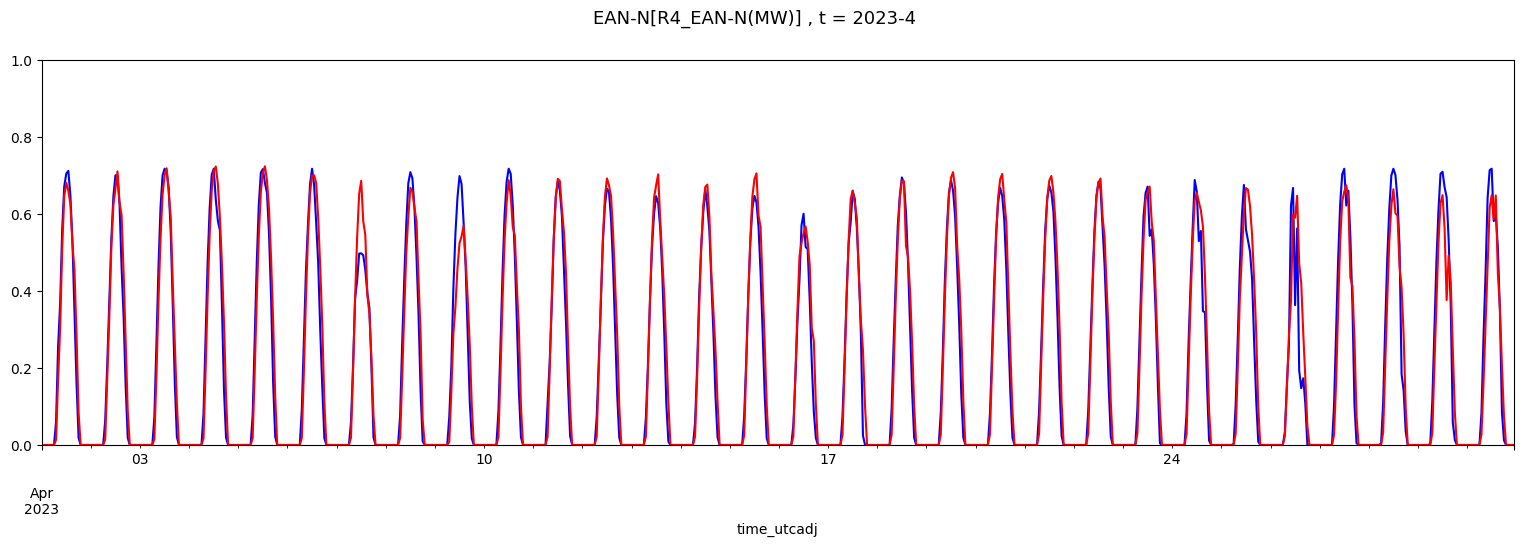

In [59]:
name_index = 1
month = 4
t = str(year) + '-' + str(month)
print(name_list[name_index])

fig, ax = plt.subplots(figsize=(19,5))
fig.suptitle(name_list[name_index] + ' , t = '+ t , fontsize=13)
# data_actual[name_list[name_index]][(day*24):((day*24)+(24*spanday))].plot()
# df[name_list[name_index]][(day*24):((day*24)+(24*spanday))].plot()
data_actual[name_list[name_index]].loc[t].plot(ax = ax,color = 'blue', ylim = (0,1))
df[name_list[name_index]].loc[t].plot(ax = ax,color = 'red', ylim = (0,1))


In [60]:
import numpy as np

def calc_euclidean(actual, predic):
    return np.round(np.sqrt(np.sum((actual - predic) ** 2)),3)

def calc_mae(actual, predic):
    return np.round(np.mean(np.abs((actual - predic))),3)


print(" year ====== ",year)
print("                   ")
for name_index in range(len(name_list)):
    ts = pd.DataFrame()
    ts['actual'] = data_actual[name_list[name_index]]
    ts['era5'] = df[name_list[name_index]]
    ## Pearson Correlation ##   
    print('plant = ', name_list[name_index])
    print("          ")
    print("     correalation     ")
    print(ts.loc[ts['actual'] > 0].corr())
    print("          ")
    print('calc_euclidean',calc_euclidean(ts['actual'].loc[ts['actual'] > 0],ts['era5'].loc[ts['actual'] > 0]))
    print('calc_mae = ',calc_mae(ts['actual'].loc[ts['actual'] > 0],ts['era5'].loc[ts['actual'] > 0]))
    print("     ")


 year ======  2023
                   
plant =  BCPG-N[MCC_BCP-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.861563
era5    0.861563  1.000000
          
calc_euclidean 7.185
calc_mae =  0.09
     
plant =  EAN-N[R4_EAN-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.840682
era5    0.840682  1.000000
          
calc_euclidean 8.504
calc_mae =  0.099
     
plant =  NED-N[R1_NED-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.809254
era5    0.809254  1.000000
          
calc_euclidean 8.716
calc_mae =  0.1
     
plant =  SSP-N[R1_SSP-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.856988
era5    0.856988  1.000000
          
calc_euclidean 8.464
calc_mae =  0.095
     
plant =  EAL-N[R4_EAL-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.813491
era5    0.813491  1.000000
          
calc_eu